In [233]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from time import time

In [290]:
data = pd.read_csv("synthetic_data.csv")
data = data[["feature", "target"]]
data["feature"] = (data["feature"] - data["feature"].mean()) / data["feature"].std()

data_train = data.sample(frac=0.8, random_state=42)
data_test = data.drop(data_train.index)

In [296]:
L = 0.01
iters = 1000
k = 21

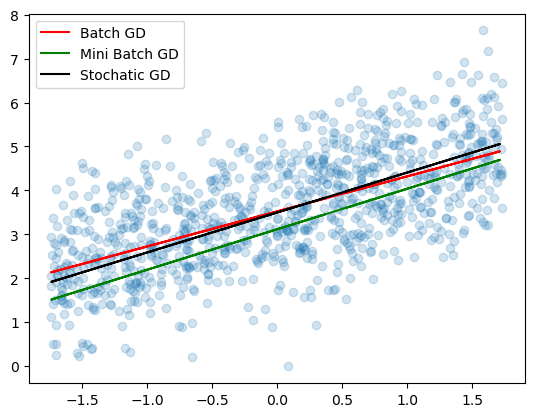

In [298]:
class GDLinearRegression:
    def __init__(self, learning_rate, max_iter):
        self.lr = learning_rate
        self.max_iter = max_iter
        self.coef = 0
        self.intercept = 0

    def fitBatchGD(self, X, y):
        m = len(X)
        for _ in range(self.max_iter):
            y_pred = self.predict(X)
            gradient_coef = -2 / m * np.sum(X * (y - y_pred))
            gradient_intercept = -2 / m * np.sum(y - y_pred)
            self.coef -= self.lr * gradient_coef
            self.intercept -= self.lr * gradient_intercept

    def fitMiniBatchGD(self, X, y, k):
        indices = np.random.choice(len(X), k, replace=False)
        X_batch = np.array(X)[indices]
        y_batch = np.array(y)[indices]
        self.fitBatchGD(X_batch, y_batch)

    def fitStochasticGD(self, X, y):
        m = len(X)
        X = np.array(X)
        y = np.array(y)
        for _ in range(self.max_iter):
            for i in range(m):
                y_pred = self.predict(X[i])
                gradient_coef = -2 * X[i] * (y[i] - y_pred)
                gradient_intercept = -2 * (y[i] - y_pred)
                self.coef -= self.lr * gradient_coef
                self.intercept -= self.lr * gradient_intercept
        
    def predict(self, X):
        return self.coef * X + self.intercept

    def reset(self):
        self.coef = 0
        self.intercept = 0


lr = GDLinearRegression(L, iters)

lr.fitBatchGD(data_train.feature, data_train.target)
predict_BatchGD = lr.predict(data_test.feature)
plt.plot(data_test.feature, predict_BatchGD, c="red", label="Batch GD")

lr.reset()

lr.fitMiniBatchGD(data_train.feature, data_train.target, k)
predict_MiniBatchGD = lr.predict(data_test.feature)
plt.plot(data_test.feature, predict_MiniBatchGD, c="green", label="Mini Batch GD")

lr.reset()

lr.fitStochasticGD(data_train.feature, data_train.target)
predict_StochasticGD = lr.predict(data_test.feature)
plt.plot(data_test.feature, predict_StochasticGD, c="black", label="Stochatic GD")

plt.scatter(data.feature, data.target, alpha=0.2)
plt.legend()


In [288]:
np.random.seed(int(time()))
X = np.random.rand(1000, 1)
y = 3 * X.squeeze() + 2 + np.random.randn(1000) 
data = pd.DataFrame({'feature': X.squeeze(), 'target': y})
data.to_csv('synthetic_data.csv', index=True)